In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_T256_H05_tl_110data import \
    get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
config = get_config()
deltaT = config.deltaT
print(config.loss_factor)

2


0.0824356691947019 inf


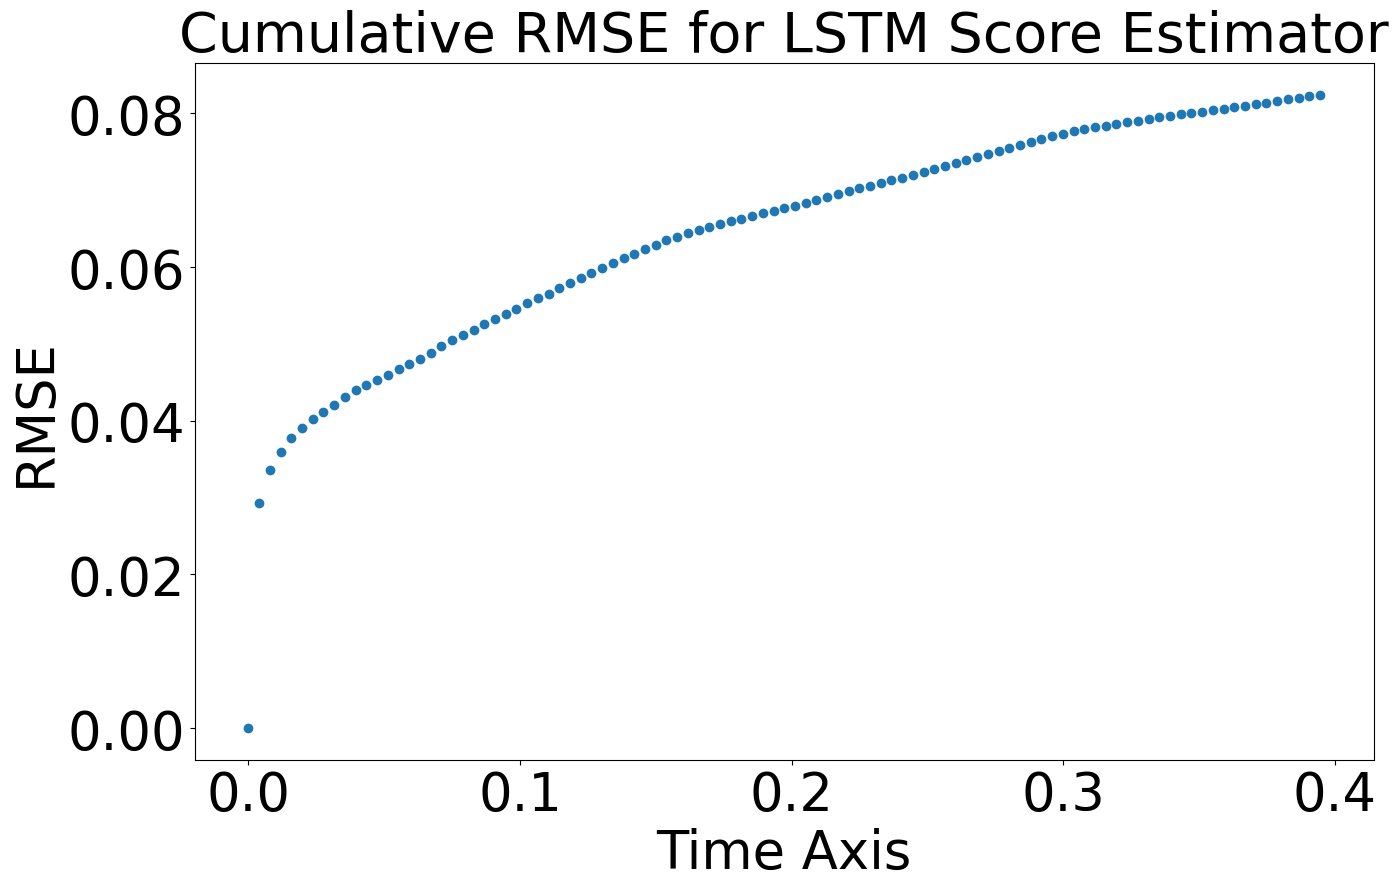

Final time cumulative RMSE local-time error 0.0824356691947019 at Nepoch 60 for 0.75FConst

0.08307725378235815 0.0824356691947019
0.08443209586194084 0.0824356691947019
0.07370557206262913 0.0824356691947019


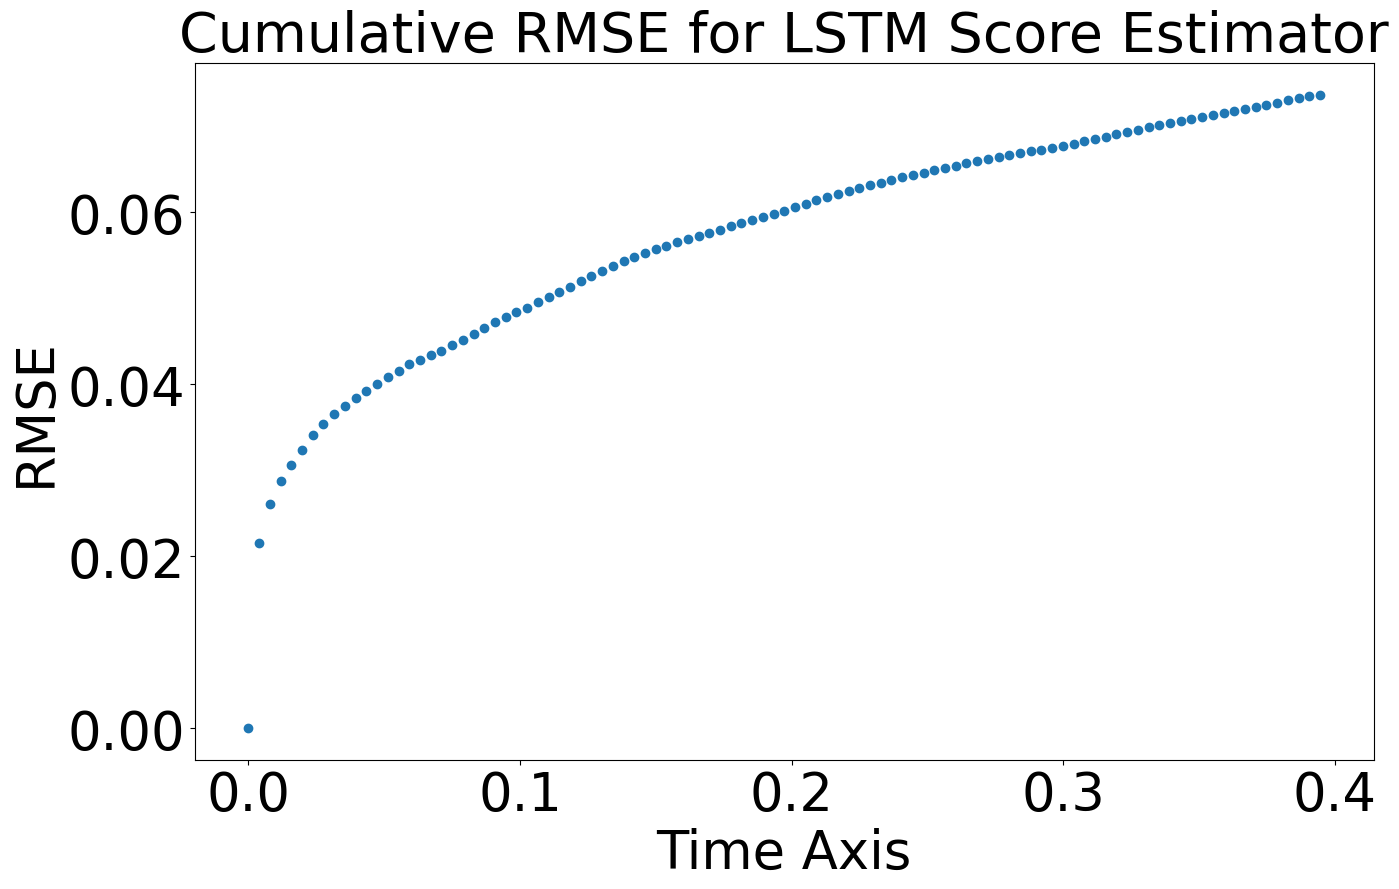

Final time cumulative RMSE local-time error 0.07370557206262913 at Nepoch 300 for 0.75FConst

0.08001643276265179 0.07370557206262913
0.07738542755408122 0.07370557206262913
0.07906945474331231 0.07370557206262913
0.08254191466931031 0.07370557206262913
0.07578907318863384 0.07370557206262913
0.08393221894786057 0.07370557206262913
0.07887418285739956 0.07370557206262913
0.07763878835706331 0.07370557206262913


In [21]:
curr_rmse = np.inf
toSave = False
for Nepoch in config.max_epochs:
    try:
        num_diff_times = 1
        save_path = (
                project_config.ROOT_DIR + f"experiments/results/TSPM_LSTM_{config.ndims}DLorenz_DriftTrack_{Nepoch}Nep_tl{config.tdata_mult}data_{config.t0}t0_{config.deltaT:.3e}dT_{num_diff_times}NDT_{config.loss_factor}LFac_{round(config.forcing_const,3)}FConst").replace(
            ".", "")
        true_states = np.load(save_path + "_global_true_states.npy")/np.sqrt(config.deltaT)
        local_states= np.load(save_path + "_local_states.npy")/np.sqrt(config.deltaT)
        local_errors = np.power(np.cumsum(np.mean(np.power(true_states- local_states,2), axis=0), axis=0), 0.5)
        total_local_errors = np.power(np.sum(np.power(local_errors, 2), axis=1)/np.arange(1, local_errors.shape[0]+1), 0.5)
        print(total_local_errors[-1], curr_rmse)
        if total_local_errors[-1] < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
            ax.set_title(f"Cumulative RMSE for LSTM Score Estimator",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/4DLnz_{Nepoch}Nep_PM_LSTM_{config.forcing_const}FConst").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative RMSE local-time error {total_local_errors[-1]} at Nepoch {Nepoch} for {config.forcing_const}FConst\n")
    except FileNotFoundError as e:
        print(e)
        raise RuntimeError

In [22]:
"""After 300 (not inlcusive):
0.08001643276265179 0.07370557206262913
0.07738542755408122 0.07370557206262913
0.07906945474331231 0.07370557206262913
0.08254191466931031 0.07370557206262913
0.07578907318863384 0.07370557206262913
0.08393221894786057 0.07370557206262913
0.07887418285739956 0.07370557206262913
0.07763878835706331 0.07370557206262913"""""

'After 2920 (not inlcusive):\n0.08001643276265179 0.07370557206262913\n0.07738542755408122 0.07370557206262913\n0.07906945474331231 0.07370557206262913\n0.08254191466931031 0.07370557206262913\n0.07578907318863384 0.07370557206262913\n0.08393221894786057 0.07370557206262913\n0.07887418285739956 0.07370557206262913\n0.07763878835706331 0.07370557206262913'